Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Epoch 1/20
20/20 [==============================] - 82s 830ms/step - loss: 0.4909 - accuracy: 0.8052 - val_loss: 21225.0117 - val_accuracy: 0.7500
Epoch 2/20
20/20 [==============================] - 16s 778ms/step - loss: 0.2669 - accuracy: 0.8961 - val_loss: 93.1826 - val_accuracy: 0.3000
Epoch 3/20
20/20 [==============================] - 17s 867ms/step - loss: 0.1588 - accuracy: 0.9416 - val_loss: 75.7137 - val_accuracy: 0.7500
Epoch 4/20
20/20 [==============================] - 12s 574ms/step - loss: 0.1040 - accuracy: 0.9805 - val_loss: 131.9279 - val_accuracy: 0.7500
Epoch 5/20
20/20 [==============================] - 14s 678ms/step - loss: 0.1609 - accuracy: 0.9545 - val_loss: 276.0719 - val_accuracy: 0.7500
Epoch 6/20
20/20 [==============================] - 12s 578ms/step - loss: 0.0963 - accuracy: 0.9838 - val_loss: 213.0653 - val_accuracy: 0.7500
Epoch 7/20
20/20 [==============================] - 14s 706ms/step - loss: 0.0903 - accuracy: 0.9838 - val_loss: 7.5936 - val_accu

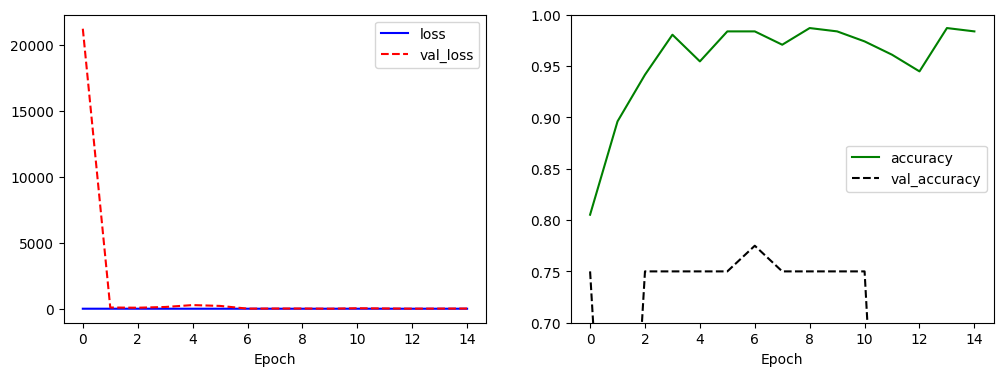

Found 404 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - ETA: 0s - loss: 0.0561

25/25 [==============================] - 10s 226ms/step - loss: 0.0561
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 0.0302

25/25 [==============================] - 7s 273ms/step - loss: 0.0302
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 0.0079

25/25 [==============================] - 6s 219ms/step - loss: 0.0079
Epoch 4/10
25/25 [==============================] - ETA: 0s - loss: 0.0060

25/25 [==============================] - 7s 260ms/step - loss: 0.0060
Epoch 5/10
25/25 [==============================] - ETA: 0s - loss: 0.0050

25/25 [==============================] - 7s 264ms/step - loss: 0.0050
Epoch 6/10
25/25 [==============================] - ETA: 0s - loss: 0.0047

25/25 [==============================] - 6s 222ms/step - loss: 0.0047
Epoch 7/10
25/25 [==============================] - ETA: 0s - loss: 0.0045

25/25 [==============================] - 7s 275ms/step - loss: 0.0045
Epoch 8/10
25/25 [==============================] - ETA: 0s - loss: 0.0043

25/25 [==============================] - 6s 252ms/step - loss: 0.0043
Epoch 9/10
25/25 [==============================] - ETA: 0s - loss: 0.0040

25/25 [==============================] - 6s 227ms/step - loss: 0.0040
Epoch 10/10
25/25 [==============================] - ETA: 0s - loss: 0.0038

25/25 [==============================] - 7s 272ms/step - loss: 0.0038


In [ ]:
# 필요한 라이브러리를 임포트합니다.
import os
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, DenseNet121, ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape, Dropout, ActivityRegularization, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt


# 데이터셋의 경로를 설정합니다.
train_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img_hori/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img_hori/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=1,
                             validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='binary',
                                                   subset='validation')

# 전이 학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# # MobileNetV2 모델 불러오기
# base_model = MobileNetV2(weights='imagenet', include_top=False)

# Densnet
# base_model = densenet.DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

base_model = ResNet101V2(include_top=False,weights="imagenet")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# ModelCheckpoint 콜백을 정의합니다.
model_checkpoint = ModelCheckpoint('best_model_resnet011v2.h5', monitor='val_loss', mode='min', save_best_only=True)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping, model_checkpoint])  # EarlyStopping 콜백을 추가합니다.


# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상탐지 모델
# Convolutional Autoencoder를 정의합니다.
input_img = Input(shape=(224, 224, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.5)(x)  # Dropout layer를 추가합니다.
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255)
good_generator_train = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                        target_size=(224, 224),
                                                        batch_size=16,
                                                        class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                        subset='training')

good_generator_val = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                      target_size=(224, 224),
                                                      batch_size=16,
                                                      class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                      subset='validation')




# ModelCheckpoint 콜백을 정의합니다.
autoencoder_checkpoint = ModelCheckpoint('best_model_autoencoder.h5', monitor='val_loss', mode='min', save_best_only=True)



# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator_train,
                epochs=10,
                steps_per_epoch=good_generator_train.samples // good_generator_train.batch_size,
                validation_data=good_generator_val,
                validation_steps=good_generator_val.samples // good_generator_val.batch_size,
                callbacks=[early_stopping, autoencoder_checkpoint])  # EarlyStopping과 ModelCheckpoint 콜백을 추가합니다.
# 이상 탐지 모델을 정의하고 학습합니다.
# Autoencoder 모델을 예시로 사용하였습니다.
# input_img = Input(shape=(224, 224, 3))
# x = Flatten()(input_img)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# encoded = Dense(32, activation='relu')(x)

# x = Dense(64, activation='relu')(encoded)
# x = Dense(128, activation='relu')(x)
# decoded = Dense(224 * 224 * 3, activation='sigmoid')(x)
# decoded = Reshape((224, 224, 3))(decoded)

# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='mse')

# # 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
# good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

# good_datagen = ImageDataGenerator(rescale=1./255)
# good_generator = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
#                                                   target_size=(224, 224),
#                                                   batch_size=16,
#                                                   class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
#                                                   subset='training')

# # 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
# autoencoder.fit(good_generator,
#                 epochs=10,
#                 steps_per_epoch=good_generator.samples // good_generator.batch_size,
#                 callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import time

# 테스트 데이터 제너레이터 생성
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 가중치 불러오기
resnet_model = load_model('best_model_resnet011v2.h5')  # 전이 학습 모델
autoencoder_model = load_model('best_model_autoencoder.h5')  # 이상 탐지 모델

# 결과를 저장할 빈 리스트를 생성합니다.
predictions = []
inference_times = []

# 테스트 데이터 예측 및 inference time 측정
for i in range(len(test_generator)):
    data = test_generator[i][0]
    start_time = time.time()
    resnet_prediction = resnet_model.predict(data)
    autoencoder_prediction = autoencoder_model.predict(data)
    end_time = time.time()
    inference_time = end_time - start_time

    # 전이 학습 모델과 이상 탐지 모델의 예측을 앙상블합니다.
    ensemble_prediction = (resnet_prediction + autoencoder_prediction) / 2.0

    # 결과를 저장합니다.
    predictions.append(ensemble_prediction)
    inference_times.append(inference_time)

# 각 예측에 대해 good 또는 ng 판정
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_classes = np.where(predictions >= 0.5, "Good", "NG")

# 파일명, 예측 결과 및 예측 확률, inference time 출력
for filename, prediction, prob, inference_time in zip(test_generator.filenames, predicted_classes, predictions, inference_times):
    print(f'Filename: {filename}, Prediction: {prediction}, Probability: {prob[0]:.2%}, Inference time: {inference_time:.2f} seconds')


Found 8 images belonging to 2 classes.


ValueError: ignored

# 코드 수정

In [ ]:
# 필요한 라이브러리를 임포트합니다.
import os
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, DenseNet121, ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape, Dropout, ActivityRegularization, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt


# 데이터셋의 경로를 설정합니다.
train_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img_hori/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img_hori/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=1,
                             validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='binary',
                                                   subset='validation')

# 전이 학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# # MobileNetV2 모델 불러오기
# base_model = MobileNetV2(weights='imagenet', include_top=False)

# Densnet
# base_model = densenet.DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

base_model = ResNet101V2(include_top=False,weights="imagenet")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# ModelCheckpoint 콜백을 정의합니다.
model_checkpoint = ModelCheckpoint('best_model_resnet011v2.h5', monitor='val_loss', mode='min', save_best_only=True)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping, model_checkpoint])  # EarlyStopping 콜백을 추가합니다.


# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상탐지 모델
# Convolutional Autoencoder를 정의합니다.
input_img = Input(shape=(224, 224, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.5)(x)  # Dropout layer를 추가합니다.
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

good_generator_train = good_datagen.flow_from_directory(good_images,
                                                        target_size=(224, 224),
                                                        batch_size=16,
                                                        class_mode='input',
                                                        subset='training')

good_generator_val = good_datagen.flow_from_directory(good_images,
                                                      target_size=(224, 224),
                                                      batch_size=16,
                                                      class_mode='input',
                                                      subset='validation')

# ModelCheckpoint 콜백을 정의합니다.
autoencoder_checkpoint = ModelCheckpoint('best_model_autoencoder.h5', monitor='val_loss', mode='min', save_best_only=True)

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator_train,
                epochs=10,
                steps_per_epoch=good_generator_train.samples // good_generator_train.batch_size,
                validation_data=good_generator_val,
                validation_steps=good_generator_val.samples // good_generator_val.batch_size,
                callbacks=[early_stopping, autoencoder_checkpoint])  # EarlyStopping과 ModelCheckpoint 콜백을 추가합니다.


Found 738 images belonging to 2 classes.
Found 184 images belonging to 2 classes.


Epoch 1/20


KeyboardInterrupt: ignored

In [ ]:
good_images = os.path.join(train_dir, 'good')
good_images

NameError: ignored

In [ ]:
for filename in os.listdir(good_images):
    print(filename)

NameError: ignored